In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 
from google.colab import files
uploaded = files.upload()

Saving QUESTION2_data.xlsx to QUESTION2_data.xlsx
Saving x_test.npy to x_test.npy
Saving x_train.npy to x_train.npy
Saving y_test.npy to y_test.npy
Saving y_train.npy to y_train.npy


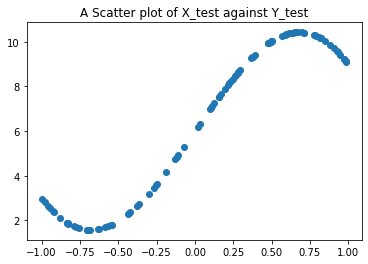

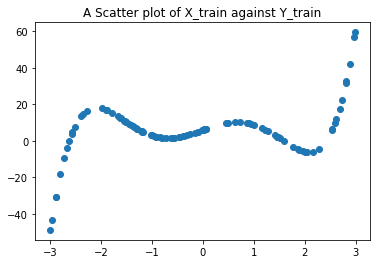

In [2]:
# Loading in the training dataset
cola=np.load('x_train.npy')
colB=np.load('y_train.npy')
colA = np.array(cola)
colA=colA.tolist()
colA= [item for sublist in colA for item in sublist]

#Loading of the test dataset
colI=np.load('x_test.npy')
colII=np.load('y_test.npy')
colI = np.array(colI)
colI=colI.tolist()
colI= [item for sublist in colI for item in sublist]

# Visualization of test data
plt.scatter(colI,colII)
plt.title('A Scatter plot of X_test against Y_test')
plt.show()

# The test set indicates a non-linear relationship between the x-test and y-test variables. 

# visualization of  training data
plt.scatter(colA,colB)
plt.title('A Scatter plot of X_train against Y_train')
plt.show()

In [3]:
# FUNCTIONS USED IN ACCESSING ACCURACY OF MODELS DEVELOPED.
# calculating the accuracy of my models
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

# calculating the mean square error  of my models
def mse(y_pred, y,n):
    a= np.sum((y - y_pred) ** 2)
    b= (1/n)*a   
    return b




The training set indicates a non-linear relationship as well between the x-train and y-train variables. Both training and test dataset show a non-linear relationship between variables. 
I engeneer the features to add non-linearity by taking the 2nd, 3rd, 4th and so on orders of x-train variable (independent variable.)\
In trying to find the non-linear relationship between the variables I tried the 2nd order, 3rd order, 4th order, and 5th order basis functions.
I decided not to try other higher polynomials because I wanted to avoid overfitting.\
The next batch of code finds the 2nd order polynomial function. 


[9.07806123 9.72547842]


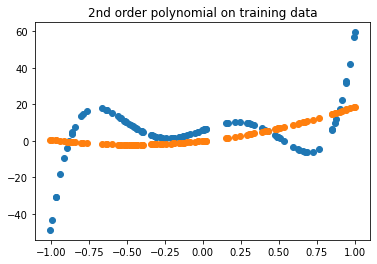

This is the accuracy of the model: 0.06860086351933248
This is the mean square error of the model: 187.57995023162204


In [9]:

# 2nd order polynomial function 
array= np.array([colA,colB])
data=pd.DataFrame(array).T

# feature engineering the x variable.
data['x_2'] = data[0]**2

# separating the target variable from the features.
y= data[1]
X= data[[0,'x_2']]

# normalizing the dataset so it converges faster
m = len(X)
X = X/X.max()

# defining the hypothesis function
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

# defining the cost function
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)


# writing the function for gradient descent
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta
    print(theta)
    print(J)


# initalizing the data alpha= 0.05, 700 epochs
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)

# printing out the theta for the function 
print(theta)

#y_hat is the predicted y values
y_hat = hypothesis(X, theta)

# plotting 
#%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X[0],y= y)           
plt.scatter(x=X[0], y=y_hat)
plt.title('2nd order polynomial on training data')
plt.show()

# testing the efficiency of 2nd order function
print('This is the accuracy of the model:',r2score(y_hat,y))
print('This is the mean square error of the model:',mse(y_hat, y,len(y)))



The 2nd order basis function as presented by the graph does not capture the non-linearity between the variables, so I decided to try a higher order of 3. 
The accuracy of this model is very low 6.8% and has a high mean square error of 187.57


[-10.41489164   9.38207002  32.60883485]


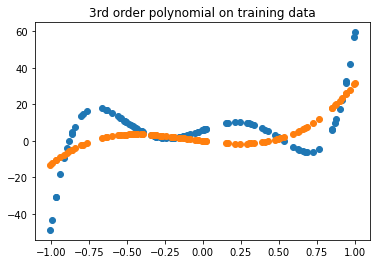

This is the accuracy of the model: 0.4635602517502371
This is the mean square error of the model: 108.03675603476684


In [10]:
# 3rd order basis function 
# feature engineering the x variable.
data['x_3'] = data[0]**3
X= data[[0,'x_2','x_3']]

# normalizing the dataset so it converges faster
m = len(X)
X = X/X.max()

# defining the hypothesis function
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

# defining the cost function
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)


# writing the function for gradient descent
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta
    print(theta)
    print(J)


# initalizing the data alpha= 0.05, 700 epochs
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)

# printing out the theta for the function 
print(theta)


#y_hat is the predicted y values
y_hat = hypothesis(X, theta)

# plotting 
#%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X[0],y= y)           
plt.scatter(x=X[0], y=y_hat)
plt.title('3rd order polynomial on training data')
plt.show()

# testing the efficiency of 3rd order function
print('This is the accuracy of the model:',r2score(y_hat,y))
print('This is the mean square error of the model:',mse(y_hat, y,len(y)))



This cubic function fits the training set better than the 2nd order polynomial function. 
The cubic function model performed better than the 2nd order function model with an accuracy of 46% and mean squared error of 108.03. The model performed better and had a smaller error which is good.
I decided to still find out how it fits using the 4th order function.



[-10.43422889  10.2875198   32.63668183  -1.91948701]


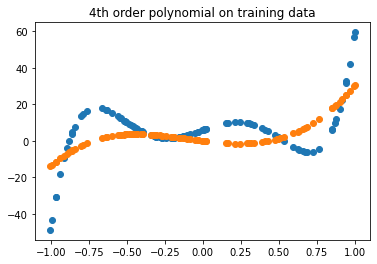

This is the accuracy of the model: 0.46801445770720274
This is the mean square error of the model: 107.13969729914675


In [11]:
# 4th order basis function 
# feature engineering the x variable.
data['x_4'] = data[0]**4
X= data[[0,'x_2','x_3','x_4']]

# normalizing the dataset so it converges faster
m = len(X)
X = X/X.max()

# defining the hypothesis function
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

# defining the cost function
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)


# writing the function for gradient descent
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta
    print(theta)
    print(J)


# initalizing the data alpha= 0.05, 700 epochs
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)

# printing out the theta for the function 
print(theta)
 

#y_hat is the predicted y values
y_hat = hypothesis(X, theta)

# plotting 
#%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X[0],y= y)           
plt.scatter(x=X[0], y=y_hat)
plt.title('4th order polynomial on training data')
plt.show()

# testing the efficiency of 4th order function
print('This is the accuracy of the model:',r2score(y_hat,y))
print('This is the mean square error of the model:',mse(y_hat, y,len(y)))


the graph from the 4th order function looked very similar to the function from 3rd order and not surprisingly,produced similar accuracy and mean squred error (46% and 107 respectively). Just to have a clear understanding I produced to find the 5th order function and check how it fitted the model. I used the lines of code below. 

[-15.05542281   9.8397218   15.5216997   -1.50091632  31.43597523]


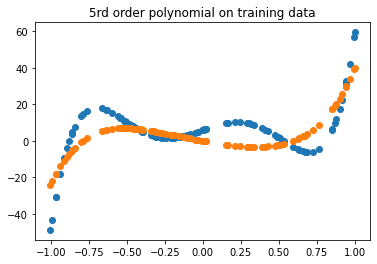

This is the accuracy of the model: 0.6548340241073873
This is the mean square error of the model: 69.51500602011717


In [12]:
# 5th order basis function 
# feature engineering the x variable.
data['x_5'] = data[0]**5
X= data[[0,'x_2','x_3','x_4','x_5']]

# normalizing the dataset so it converges faster
m = len(X)
X = X/X.max()

# defining the hypothesis function
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

# defining the cost function
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)


# writing the function for gradient descent
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta
    print(theta)
    print(J)


# initalizing the data alpha= 0.05, 700 epochs
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)

# printing out the theta for the function 
print(theta)
 

#y_hat is the predicted y values
y_hat = hypothesis(X, theta)

# plotting 
#%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X[0],y= y)           
plt.scatter(x=X[0], y=y_hat)
plt.title('5rd order polynomial on training data')
plt.show()

# testing the efficiency of 4th order function
print('This is the accuracy of the model:',r2score(y_hat,y))
print('This is the mean square error of the model:',mse(y_hat, y,len(y)))


The 5th order polynomial fitted the dataset the most but decided not to try higher functions because I did not want my model to overfit the training dataset.
The accuracy of the 5th order polynomial was very good (69.5% compared to the other 3 models)\
The mean squared error also reduced to 69.515 compared to other models which had higher average least square errors. 


QUESTION 2A

In [14]:
dt = pd.read_excel("QUESTION2_data.xlsx")
# I excluded the house ID as it is not a feature. 
y= dt.iloc[:,-1].values
x= dt.iloc[:,:-1].values

# normalize the data set
m = len(x)
x = x/x.max()

# separating the dataset to training and testing set
training_data = dt.sample(frac=0.7, random_state=25)
testing_data = dt.drop(training_data.index)

Xtrain= training_data.iloc[:,:-1].values
Ytrain= training_data.iloc[:,-1].values
Xtest=  testing_data.iloc[:,:-1].values
Ytest=  testing_data.iloc[:,-1].values


# creating the cost and gradient function
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list


# calculating weights, bias and cost

w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.0002,epochs=1000)

# predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)


# calculating the r-square or accuracy of the model 
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
print('This is the accuracy of the model:',r2score(y_pred, Ytest))

# calculating the mean square error
def mse1(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

print('This is the mean square error of my model:',(mse1(Ytest, y_pred)))



Cost is: 438.53330544435175
Cost is: 49.12342665341514
Cost is: 19.389737377276486
Cost is: 13.798150524916704
Cost is: 12.665955887119988
Cost is: 12.36287252996666
Cost is: 12.2188464571465
Cost is: 12.109764628821537
Cost is: 12.012240786666268
Cost is: 11.921510346636492
This is the accuracy of the model: 0.8653763842540774
This is the mean square error of my model: 38.91186231448101


The model performs well with an accuracy of 86% and a low average least square error of 38.911 \
The average least squares error is 38.911





QUESTION 2B

In [16]:
# checking out which variable had the most effect on the final value
features= training_data.columns
res = dict(zip(features,w))

fin_max = max(res, key=res.get)
print("The feature with maximum weight:",fin_max)
print('Maximum weight',np.max(w))


The feature with maximum weight: local_price
Maximum weight 2.183058421139697


The results indicates that local_price has the most effect on price, because it has the highest weight or impact on the target value.\
Yes,I can use only local price as the target variable becuase it has the most impact.\
I am able to determine this by finding the biggest weight or coeffcient from the weights obtained from my model.


In [18]:
# checking out which variable had the least effect on the final value. 
fin_min = min(res, key=res.get)
print("The feature with minimum weight:",fin_min)
print('minimum weight',np.min(w))



The feature with minimum weight: age_of_home 
minimum weight -0.06436878415372455


The results indicates that age of home has the least effect on price.\
I am able to determine this my finding the least weight or coeffcient, or the weight closet to zero. 


QUESTION 2 (3C)

In [20]:
dt=dt.loc[:, dt.columns!='age_of home']
y= dt.iloc[:,-1].values
x= dt.iloc[:,:-1].values

# normalize the data set
m = len(x)
x = x/x.max()

# separating the dataset to training and testing set
training_data = dt.sample(frac=0.7, random_state=25)
testing_data = dt.drop(training_data.index)

Xtrain= training_data.iloc[:,:-1].values
Ytrain= training_data.iloc[:,-1].values
Xtest=  testing_data.iloc[:,:-1].values
Ytest=  testing_data.iloc[:,-1].values

# creating the cost and gradient function
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list



# calculating weights and bias

w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.0002,epochs=15000)


# predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

print('This is the accuracy of the model:',r2score(y_pred, Ytest))
print('This is the mean square error of my model:',(mse1(Ytest, y_pred)))




Cost is: 438.53330544435175
Cost is: 11.475448594225252
Cost is: 10.769139903119019
Cost is: 10.306840659773375
Cost is: 9.946776898266133
Cost is: 9.647357012255945
Cost is: 9.391799684351598
Cost is: 9.170600855223604
Cost is: 8.977128350546588
Cost is: 8.806315815763051
This is the accuracy of the model: 0.8888306709090368
This is the mean square error of my model: 32.132591322944045


The model performs better with accuracy of 88.88% and a mean square error of 32.13%. The initial model had an accuracy of 86.53% and mean square error of 38.91.

QUESTION 3

(100, 2)


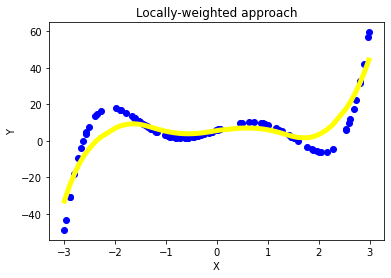

In [21]:
# Defining the functions to used. 
# Gaussian kernel
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights

def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T) #local weight
    return W

def localWeightRegression(xmat, ymat, k):
    # xmat is the input variable
    # ymat is the column b (ie the y variable)
    #k is the bandwith
    m,n = np.shape(xmat) # dimensions of the input function
    ypred = np.zeros(m)
    
    for i in range(m): #for i from o to m (m is the row of the input variable)
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred

#data 
#processing the data to be used for processing
cola=np.load('x_train.npy')
colb=np.load('y_train.npy')

colA = np.array(cola)
colA=colA.tolist()
colAi= [item for sublist in colA for item in sublist]
colA= np.array(colAi)
colB = np.array(colb)

# converting data to numpy matrices
mcolA = np.mat(colA)
mcolB = np.mat(colB) # this is the y variable

# reshaping of the matrix
m = np.shape(mcolB)[1]

# inialize column of ones
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mcolA.T)) # this gives the inout variable x
print(X.shape)


# final code to be run! 
ypred = localWeightRegression(X, mcolB, 0.5) # 0.5 is the bandwith represented as k. 

#HOW TO PLOT
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally-weighted approach')
plt.show()



There is no need for basis functions when using a locally weighted approach.\
**Locally weighted linear regression** is a non-parametric algorithm, 
that is, the model does not learn a fixed set of parameters as is done in ordinary linear regression.\
Rather parametersor weigths are computed individually for each query point(x).
While computing the weights, a higher “preference” is given to the points in the training set lying in the vicinity of the query point
than the points lying far away from x.\
For **polynomial basis functions**:\
This approach engineers the features and very sentitive to outliers. The polynomial basis function learns a fixed set of parameters.
The presence of one or two outliers in the data can seriously affect the results of nonlinear analysis.
In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression. 

